# **Contrast Enhancement**

**Import Library**

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

**Reading & display an exceptional image**

In [2]:
img_color= cv2.imread(r'C:\Users\nguye\OneDrive\code_anything\computerVision\pic_test.jpg',cv2.IMREAD_COLOR)

In [3]:
img_grayscale = cv2.imread(r'C:\Users\nguye\OneDrive\code_anything\computerVision\pic_test.jpg', cv2.IMREAD_GRAYSCALE)

In [4]:
gray_img=cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)

In [5]:
cv2.imshow('color image', img_color)
# Waits for a keystroke
cv2.waitKey(0) 

-1

In [6]:
cv2.imshow('grayscale image', gray_img)
# Waits for a keystroke
cv2.waitKey(0) 

-1

In [7]:
cv2.imshow('grayscale image', img_grayscale)
# Waits for a keystroke
cv2.waitKey(0)  

-1

**Compute histogram and cumulative distribution function**

In [8]:
def get_cdf_hist(image_input):
    hist, bins = np.histogram(image_input.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    return cdf_normalized

In [9]:
#get_cdf_hist(img_grayscale)

## **Linear transform**  
*stretching the distribution of grey levels in the whole grey levels range.*

In [10]:
#Linear transformation function to enhance brightness and contrast
#y_i = f(x_i) = alpha * x_i + beta
'''
alpha: contrast factor
beta: brightness factor
'''
def contrast_brightness(image, alpha, beta):
    enhanced_image = np.array(alpha*image + beta)
    enhanced_image[enhanced_image > 255] = 255
    cdf = get_cdf_hist(enhanced_image)
    return enhanced_image, cdf

In [11]:
#contrast_brightness(img_color, 1, 0)

## **Non linear transform**

**Log transformations**

In [12]:
# y_i = f(x_i) = alpha * log(1 + x_i/255)
'''
alpha is the scaling/gain factor.
gain: contrast enhancement factor
'''
def log_enhancement(image, gain):
    normalized_image = image / np.max(image)
    enhanced_image = gain*np.log1p(normalized_image)
    enhanced_image = enhanced_image * 255
    cdf = get_cdf_hist(enhanced_image)
    return enhanced_image, cdf

In [13]:
#log_enhancement(gray_img,1.65)

**Gamma transformations**

In [14]:
# y_i = f(x_i) = (x_i/255)**gamma * 255
'''
gamma: contrast enhancement factor
when gamma < 1, the dark pixels will be converted into bright pixels and in contrast
'''
def gamma_enhancement(image, gamma):
    normalized_image = image / np.max(image)
    enhanced_image = np.power(normalized_image, gamma)
    enhanced_image = enhanced_image * 255
    cdf = get_cdf_hist(enhanced_image)
    return enhanced_image, cdf

In [15]:
#gamma_enhancement(gray_img,0.55)

## **Histogram Equalization**

In [16]:
def hist_enhancement(image):
    enhanced_image = cv2.equalizeHist(image)
    cdf = get_cdf_hist(enhanced_image)
    return enhanced_image, cdf 

In [17]:
#hist_enhancement(gray_img)

## **Show image and histogram**

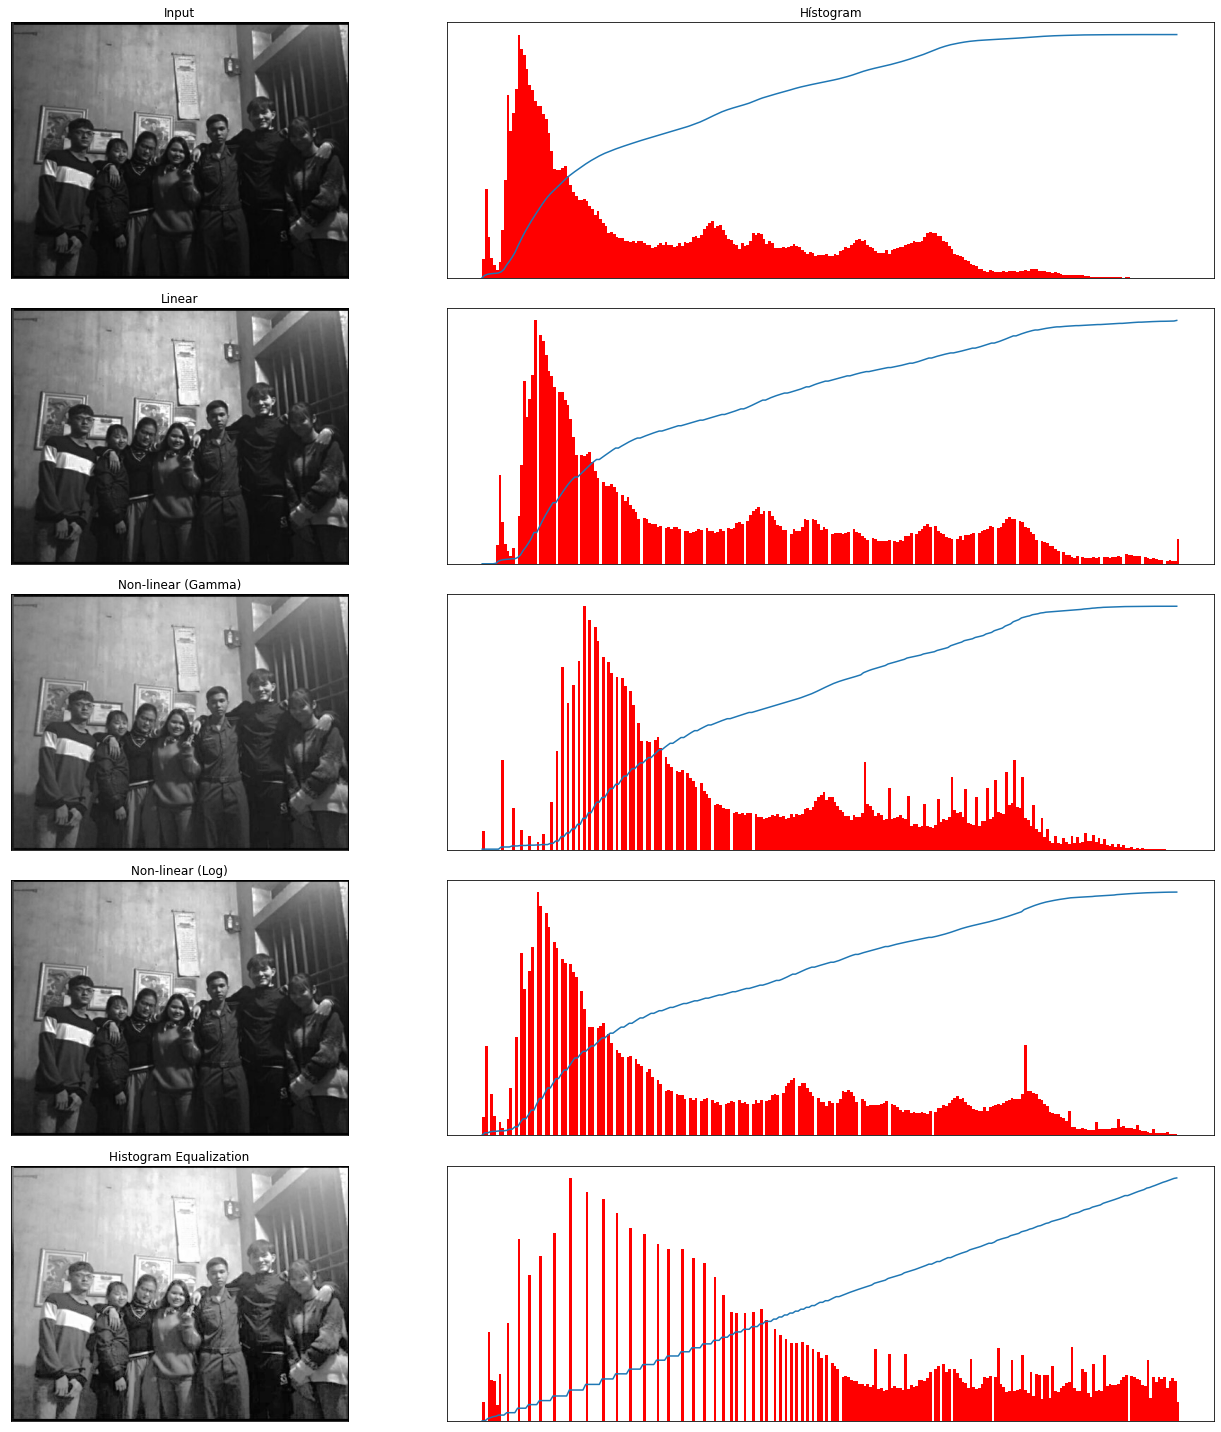

In [18]:
def image_enhancement_spatial():
    
    img_color = plt.imread(r'C:\Users\nguye\OneDrive\code_anything\computerVision\pic_test.jpg')
    img=cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
    
    cdf_input = get_cdf_hist(img)
    fig, axs = plt.subplots(5, 2, figsize=(20,20))

    axs[0, 0].imshow(img, cmap='gray', vmin=0, vmax=255)
    axs[0, 0].set_title("Input")
    axs[0, 1].hist(img.flatten(), 256, [0, 256], color='r')
    axs[0, 1].plot(cdf_input)
    axs[0, 1].set_title("Hístogram")
    
    enhanced_cb, cdf_cb = contrast_brightness(img, 1.15, 5)
    axs[1, 0].imshow(enhanced_cb, cmap='gray', vmin=0, vmax=255)
    axs[1, 0].set_title("Linear")
    axs[1, 1].hist(enhanced_cb.flatten(), 256, [0, 256], color='r')
    axs[1, 1].plot(cdf_cb)

    enhanced_gamma, cdf_gamma = gamma_enhancement(img, 0.65)
    axs[2, 0].imshow(enhanced_gamma, cmap='gray', vmin=0, vmax=255)
    axs[2, 0].set_title("Non-linear (Gamma)")
    axs[2, 1].hist(enhanced_gamma.flatten(), 256, [0, 256], color='r')
    axs[2, 1].plot(cdf_gamma)

    enhanced_log, cdf_log = log_enhancement(img, 1.55)
    axs[3, 0].imshow(enhanced_log, cmap='gray', vmin=0, vmax=255)
    axs[3, 0].set_title("Non-linear (Log)")
    axs[3, 1].hist(enhanced_log.flatten(), 256, [0, 256], color='r')
    axs[3, 1].plot(cdf_log)

    enhanced_hist, cdf_hist = hist_enhancement(img)
    axs[4, 0].imshow(enhanced_hist, cmap='gray', vmin=0, vmax=255)
    axs[4, 0].set_title("Histogram Equalization")
    axs[4, 1].hist(enhanced_hist.flatten(), 256, [0, 256], color='r')
    axs[4, 1].plot(cdf_hist)

    for i in range(5):
        for j in range(2):
            axs[i, j].set_xticks([])
            axs[i, j].set_yticks([])
    plt.tight_layout()
    plt.show()




image_enhancement_spatial()

# **Image Interpolation**

In [19]:
import cv2
import numpy as np
 
img = cv2.imread(r'C:\Users\nguye\OneDrive\code_anything\computerVision\and_or.jpg',0)
#dsize=(new_height, new_width)

In [20]:
# Nearest neighbor interpolation
near_img = cv2.resize(img,None, fx = 20, fy = 20, interpolation = cv2.INTER_NEAREST)
cv2.imshow('color image', img)
#Waits for a keystroke
cv2.waitKey(0) 

-1

In [21]:
#Bilinear interpolation
bilinear_img = cv2.resize(img,None, fx = 20, fy = 20, interpolation = cv2.INTER_LINEAR)
cv2.imshow('color image', img)
# Waits for a keystroke
cv2.waitKey(0) 

-1

In [22]:
#Bicubic interpolation
bicubic_img = cv2.resize(img,None, fx = 20, fy = 20, interpolation = cv2.INTER_CUBIC)
cv2.imshow('color image', img)
# Waits for a keystroke
cv2.waitKey(0) 

-1

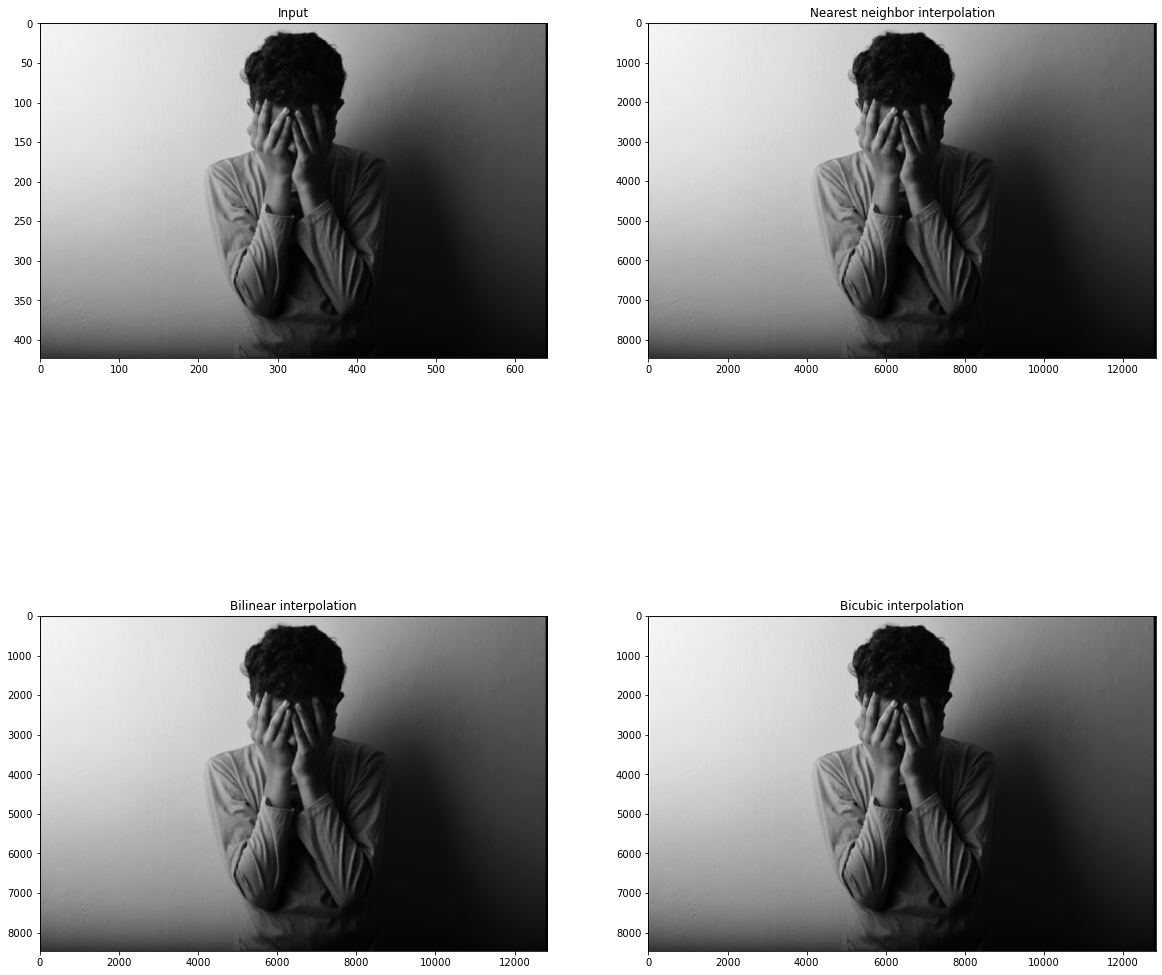

In [24]:
'''
fig, axs = plt.subplots(2, 2, figsize=(20,20))
axs[0, 0].imshow(img, cmap='gray', vmin=0, vmax=255)
axs[0, 0].set_title("Input")
axs[0, 1].imshow(near_img, cmap='gray', vmin=0, vmax=255)
axs[0, 1].set_title("Nearest neighbor interpolation")
axs[1, 0].imshow(bilinear_img, cmap='gray', vmin=0, vmax=255)
axs[1, 0].set_title("Bilinear interpolation")
axs[1, 1].imshow(bicubic_img, cmap='gray', vmin=0, vmax=255)
axs[1, 1].set_title("Bicubic interpolation")
plt.show()
'''